In [2]:
import pandas as pd
import numpy as np
df=pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/Servo%20Mechanism.csv")
df.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB


In [5]:
df.describe()

,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


In [6]:
df.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

In [7]:
df.shape

(167, 5)

In [14]:
df[['Motor']].value_counts

<bound method DataFrame.value_counts of     Motor
0       E
1       B
2       D
3       B
4       D
..    ...
162     B
163     B
164     C
165     A
166     A

[167 rows x 1 columns]>

In [15]:
df[['Screw']].value_counts

<bound method DataFrame.value_counts of     Screw
0       E
1       D
2       D
3       A
4       B
..    ...
162     C
163     E
164     D
165     B
166     A

[167 rows x 1 columns]>

In [42]:
df.replace({"Motor":{'A':0, 'B':1, 'C':2,'D':3,'E':4}},inplace=True)

In [43]:
df.replace({"Screw":{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)

In [44]:
y=df['Class']
y.shape

(167,)

In [45]:
y

0       4
1      11
2       6
3      48
4       6
       ..
162    44
163    40
164    25
165    44
166    20
Name: Class, Length: 167, dtype: int64

In [46]:
X=df[['Motor','Screw','Pgain','Vgain']]

In [47]:
X=df.drop('Class',axis=1)

In [48]:
X.shape

(167, 4)

In [49]:
X

,Motor,Screw,Pgain,Vgain
0,4,4,5,4
1,1,3,6,5
2,4,3,4,3
3,1,0,3,2
4,4,1,6,5
...,...,...,...,...
162,1,2,3,2
163,1,4,3,1
164,2,3,4,3
165,0,1,3,2


In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2529)

In [51]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((116, 4), (51, 4), (116,), (51,))

In [52]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [53]:
y_pred=lr.predict(X_test)
y_pred.shape

(51,)

In [54]:
y_pred

array([24.77550551, 29.10543104, 16.48688165, 25.99334243, 36.78608907,
       23.63383947, 11.83538465, 20.30962211, 41.14252974, 42.49632453,
       14.01360499, 26.3149139 , 16.48688165, 16.98540476, 21.95847322,
       22.99069654, -5.67330563, 31.31016652, 33.48838686,  1.33769433,
       32.10807693, 32.13459207, 33.78344318, 30.45922583, 17.28046109,
        6.33727794, 26.63648536, 17.30697622, 25.49048834,  3.33463205,
       30.99292603, 24.1632087 , 36.49103275, 32.63744616, 12.62896409,
        3.86400127, 23.81512209, 33.46187172, 17.80983031, 38.13988385,
       27.7781514 , 22.48784245, 11.80453853,  9.6263182 , 30.78079729,
       29.13194618, 34.31281241,  4.68842683, 24.66606279, 21.6634169 ,
       26.34142903])

In [55]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [56]:
mean_squared_error(y_test,y_pred)

65.72629463664789

In [57]:
mean_absolute_error(y_test,y_pred)

7.2059454166328765

In [58]:
r2_score(y_test,y_pred)

0.6822213813699728

[]

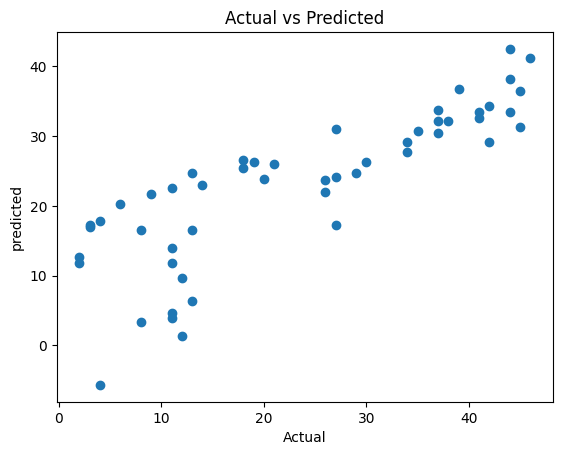

In [61]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("predicted")
plt.title("Actual vs Predicted")
plt.plot()

In [86]:
X_new = df.sample(1)

In [87]:
X_new

,Motor,Screw,Pgain,Vgain,Class
108,4,1,6,5,8


In [88]:
X_new.shape

(1, 5)

In [89]:
X_new = X_new.drop(columns=['Class'],axis=1)

In [90]:
X_new

,Motor,Screw,Pgain,Vgain
108,4,1,6,5


In [94]:
X_new.shape

(1, 4)

In [97]:
y_pred_new = lr.predict(X_new)

In [99]:
y_pred_new

array([3.33463205])